<h2>Loading the data</h2>

First, we load the file produced by the most recent simulations (in this case, sims_3.txt). We will load the data and fix the first column name.

In [4]:
data <- read.csv("/Users/Briana/Documents/GitHub/PTSD/mysims.txt")
names(data)[1] <- "Run"

<h2>Smoothing the Timestamps</h2>

Timestamps vary a bit because of the different retrieval times, which vary as function of similarity, history, and noise. To account fo this, we will round up the Time variable to the hundreds. We wil also creqate a second variable, Block, which will be an approximation of Time, further rounding up 25 consecutive time points. Finally, we will correct the Block variable so that the PTE occurrs when Block is zero.

In [5]:
data$Time <- round(data$Time/100)
data$Block<-round(data$Time/25, 0)
data$Block <- data$Block - 6

At this point, we have sufficient time points for each value of Block to plot smooth, rather than choppy, data lines. As a first step, we will average the values of V and Similarity across the different Block values and values of the traumatic event V_Traumatic.

To keep consistent names, we will rename the ugly variable V_Traumatic as PTEV (for “Peritraumatic Event’s V Value”).

In [6]:
a <- aggregate(data[c("V", "Similarity")], list(Block=data$Block, PTEV=data$V_Traumatic), mean)

<h2>Analysis of Effects of PTEV</h2>

Now, we can consider how how the model fares, after the PTE, for different values of PTEV. First, we will consider the model’s well-being. That is captured by the V variable, which captues the mean value of the memories being retrieved. Increased retrieval of traumatic memories leads, of course, to increased V values.

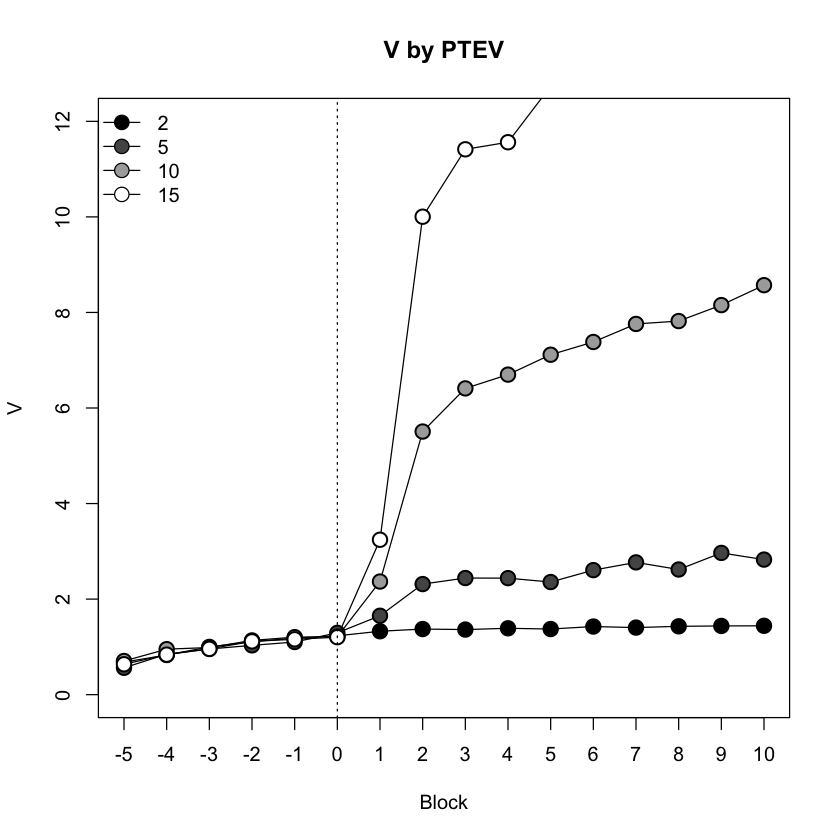

In [10]:
source('/Users/Briana/Documents/GitHub/PTSD/functions.R')
plot.by.2factors(subset(a, a$Block >= -5), 
                 "V", "Block", "PTEV", 
                 rng=c(0,12,2), legpos = "topleft")
abline(v=6, lty=3)

<h2>Analysis of Effects of PTEV on Similarity</h2>

We can also consider how well the model is doing cognitively. This is measured by the Similarity between the retrieved response and the current context. As memories become more intrusive, the similarity is expected to decrease. Decreased similarity means that the response made is not as relevant to the current context.

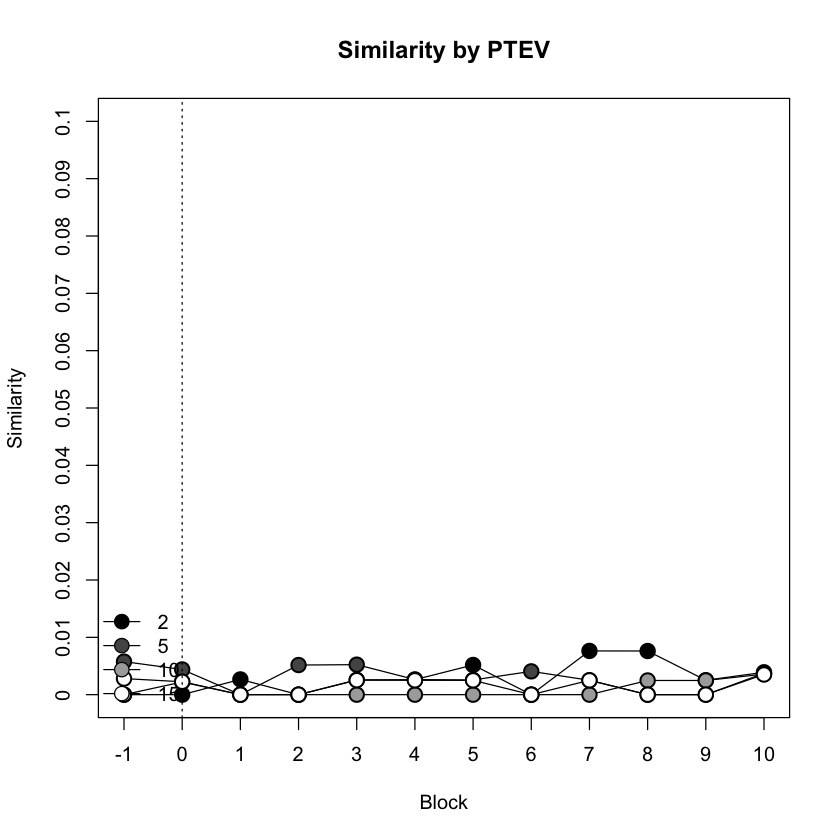

In [14]:
plot.by.2factors(subset(a, a$Block >= -1), 
                 "Similarity", "Block", "PTEV", 
                 rng=c(0,0.1,0.01),
                 legpos="bottomleft")
abline(v=2, lty=3)

<h2>Normalized Effects of PTEV</h2>

Finally, we can re-analyze V after the PTE, but normalizing the values of V by the max value that is expected. This will give us a comparable graph to that of Di Martino, which does not use absolute values for well-being. To make the plot readable, we will normalize only the activity after the PTEV, and set the previous response to zero.

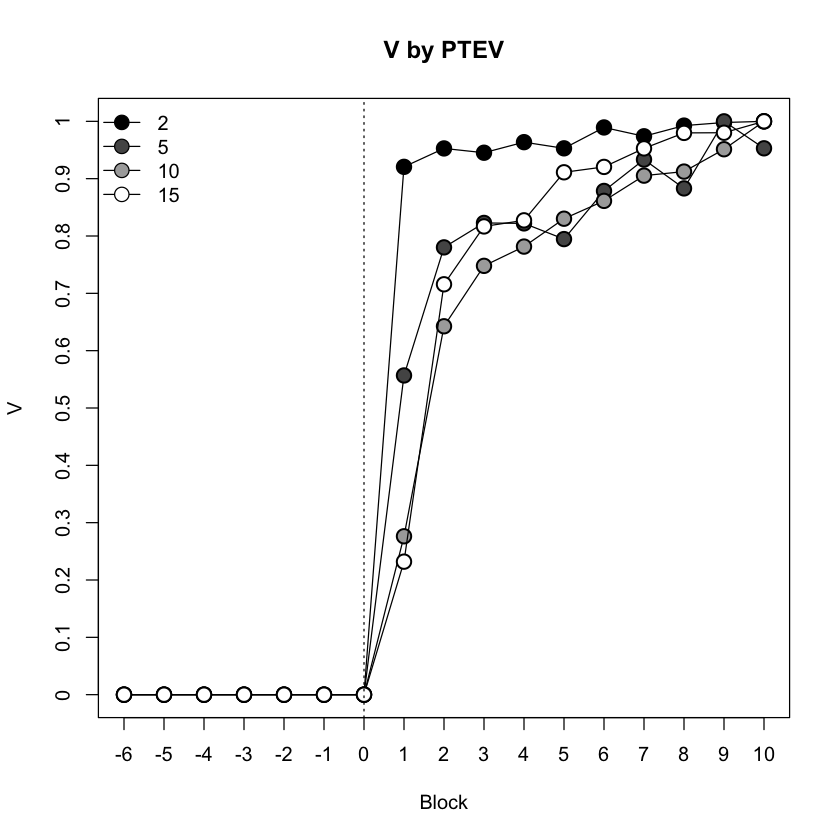

In [15]:
norm <- tapply(a$V, a$PTEV, max)
na <- a # Normed A-data
for (p in unique(na$PTEV)) {
  na$V[na$Block>0 & na$PTEV == p] <- na$V[a$Block>0 & a$PTEV == p] / max(a$V[na$Block>6 & a$PTEV == p])
  na$V[na$Block<=0 & na$PTEV == p] <- 0
}
plot.by.2factors(na, "V", "Block", "PTEV", rng=c(0,1,0.1), legpos = "topleft")
abline(v=7, lty=3)